In [36]:
import os

In [37]:
%pwd

'c:\\Users\\LENOVO\\wallet_riskscoring'

In [3]:
os.chdir('..')

In [4]:
%pwd

'c:\\Users\\LENOVO\\wallet_riskscoring'

In [38]:
import pandas as pd
import numpy as np
import requests
from tqdm import tqdm


# Fetch Transaction History

In [ ]:

COVALENT_API_KEY = 'cqt_rQd3HQxkHqxQdvfwbpwgfDwtdHMK'  # Replace with your actual API key
COVALENT_BASE_URL = 'https://api.covalenthq.com/v1'
CHAIN_ID = '1'  # Ethereum Mainnet

In [40]:
wallet_df.columns = ['wallet_id']  # Ensure column is named 'wallet_id'
wallet_df.head()

,wallet_id
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1,0x06b51c6882b27cb05e712185531c1f74996dd988
2,0x0795732aacc448030ef374374eaae57d2965c16c
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae


In [41]:
def fetch_wallet_transactions(wallet_address):
    url = f"{COVALENT_BASE_URL}/{CHAIN_ID}/address/{wallet_address}/transactions_v2/"
    params = {
        'key': COVALENT_API_KEY,
        'page-size': 1000
    }

    response = requests.get(url, params=params)
    data = response.json()

    if 'data' in data and 'items' in data['data']:
        return pd.DataFrame(data['data']['items'])
    else:
        return pd.DataFrame()  # No transactions or error

# Check first 5 wallets
active_wallets = []

for wallet in tqdm(wallet_df['wallet_id'][:104]):
    txns_df = fetch_wallet_transactions(wallet)
    if not txns_df.empty:
        active_wallets.append(wallet)
        print(f"✅ Wallet {wallet} has {len(txns_df)} txns")
    else:
        print(f"❌ Wallet {wallet} has no data or failed")

  1%|          | 1/103 [00:15<26:06, 15.36s/it]

✅ Wallet 0x0039f22efb07a647557c7c5d17854cfd6d489ef3 has 1000 txns


  2%|▏         | 2/103 [00:17<12:20,  7.33s/it]

✅ Wallet 0x06b51c6882b27cb05e712185531c1f74996dd988 has 5 txns


  3%|▎         | 3/103 [00:18<07:48,  4.69s/it]

✅ Wallet 0x0795732aacc448030ef374374eaae57d2965c16c has 4 txns


  4%|▍         | 4/103 [00:26<09:52,  5.98s/it]

✅ Wallet 0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9 has 80 txns


  5%|▍         | 5/103 [00:28<07:13,  4.42s/it]

✅ Wallet 0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae has 5 txns


  6%|▌         | 6/103 [00:30<05:54,  3.65s/it]

✅ Wallet 0x104ae61d8d487ad689969a17807ddc338b445416 has 6 txns


  7%|▋         | 7/103 [00:32<04:49,  3.01s/it]

✅ Wallet 0x111c7208a7e2af345d36b6d4aace8740d61a3078 has 6 txns


  8%|▊         | 8/103 [00:33<04:02,  2.55s/it]

✅ Wallet 0x124853fecb522c57d9bd5c21231058696ca6d596 has 7 txns


  9%|▊         | 9/103 [00:35<03:33,  2.27s/it]

✅ Wallet 0x13b1c8b0e696aff8b4fee742119b549b605f3cbc has 4 txns


 10%|▉         | 10/103 [00:38<04:06,  2.65s/it]

✅ Wallet 0x1656f1886c5ab634ac19568cd571bc72f385fdf7 has 133 txns


 11%|█         | 11/103 [00:40<03:30,  2.29s/it]

✅ Wallet 0x1724e16cb8d0e2aa4d08035bc6b5c56b680a3b22 has 6 txns


 12%|█▏        | 12/103 [00:44<04:16,  2.82s/it]

✅ Wallet 0x19df3e87f73c4aaf4809295561465b993e102668 has 31 txns


 13%|█▎        | 13/103 [00:46<03:44,  2.50s/it]

✅ Wallet 0x1ab2ccad4fc97c9968ea87d4435326715be32872 has 5 txns


 14%|█▎        | 14/103 [00:50<04:25,  2.98s/it]

✅ Wallet 0x1c1b30ca93ef57452d53885d97a74f61daf2bf4f has 121 txns


 15%|█▍        | 15/103 [00:51<03:44,  2.55s/it]

✅ Wallet 0x1e43dacdcf863676a6bec8f7d6896d6252fac669 has 3 txns


 16%|█▌        | 16/103 [00:58<05:23,  3.72s/it]

✅ Wallet 0x22d7510588d90ed5a87e0f838391aaafa707c34b has 76 txns


 17%|█▋        | 17/103 [00:59<04:22,  3.06s/it]

✅ Wallet 0x24b3460622d835c56d9a4fe352966b9bdc6c20af has 22 txns


 17%|█▋        | 18/103 [01:04<05:01,  3.54s/it]

✅ Wallet 0x26750f1f4277221bdb5f6991473c6ece8c821f9d has 7 txns


 18%|█▊        | 19/103 [01:05<03:59,  2.85s/it]

✅ Wallet 0x27f72a000d8e9f324583f3a3491ea66998275b28 has 5 txns


 19%|█▉        | 20/103 [01:07<03:24,  2.47s/it]

✅ Wallet 0x2844658bf341db96aa247259824f42025e3bcec2 has 4 txns


 20%|██        | 21/103 [01:08<02:52,  2.10s/it]

✅ Wallet 0x2a2fde3e1beb508fcf7c137a1d5965f13a17825e has 5 txns


 21%|██▏       | 22/103 [01:13<03:55,  2.90s/it]

✅ Wallet 0x330513970efd9e8dd606275fb4c50378989b3204 has 126 txns


 22%|██▏       | 23/103 [01:16<03:56,  2.95s/it]

✅ Wallet 0x3361bea43c2f5f963f81ac70f64e6fba1f1d2a97 has 132 txns


 23%|██▎       | 24/103 [01:18<03:25,  2.60s/it]

✅ Wallet 0x3867d222ba91236ad4d12c31056626f9e798629c has 4 txns


 24%|██▍       | 25/103 [01:19<03:05,  2.37s/it]

✅ Wallet 0x3a44be4581137019f83021eeee72b7dc57756069 has 4 txns


 25%|██▌       | 26/103 [01:21<02:44,  2.13s/it]

✅ Wallet 0x3e69ad05716bdc834db72c4d6d44439a7c8a902b has 5 txns


 26%|██▌       | 27/103 [01:26<03:47,  2.99s/it]

✅ Wallet 0x427f2ac5fdf4245e027d767e7c3ac272a1f40a65 has 204 txns


 27%|██▋       | 28/103 [01:56<13:43, 10.98s/it]

✅ Wallet 0x4814be124d7fe3b240eb46061f7ddfab468fe122 has 235 txns


 28%|██▊       | 29/103 [02:01<11:28,  9.31s/it]

✅ Wallet 0x4839e666e2baf12a51bf004392b35972eeddeabf has 20 txns


 29%|██▉       | 30/103 [02:03<08:35,  7.07s/it]

✅ Wallet 0x4c4d05fe859279c91b074429b5fc451182cec745 has 4 txns


 30%|███       | 31/103 [02:07<07:24,  6.17s/it]

✅ Wallet 0x4d997c89bc659a3e8452038a8101161e7e7e53a7 has 265 txns


 31%|███       | 32/103 [02:09<05:43,  4.84s/it]

✅ Wallet 0x4db0a72edb5ea6c55df929f76e7d5bb14e389860 has 5 txns


 32%|███▏      | 33/103 [02:10<04:28,  3.84s/it]

✅ Wallet 0x4e61251336c32e4fe6bfd5fab014846599321389 has 5 txns


 33%|███▎      | 34/103 [02:12<03:36,  3.14s/it]

✅ Wallet 0x4e6e724f4163b24ffc7ffe662b5f6815b18b4210 has 6 txns


 34%|███▍      | 35/103 [02:13<02:57,  2.61s/it]

✅ Wallet 0x507b6c0d950702f066a9a1bd5e85206f87b065ba has 43 txns


 35%|███▍      | 36/103 [02:15<02:40,  2.39s/it]

✅ Wallet 0x54e19653be9d4143b08994906be0e27555e8834d has 7 txns


 36%|███▌      | 37/103 [02:16<02:15,  2.05s/it]

✅ Wallet 0x56ba823641bfc317afc8459bf27feed6eb9ff59f has 5 txns


 37%|███▋      | 38/103 [02:25<04:18,  3.98s/it]

✅ Wallet 0x56cc2bffcb3f86a30c492f9d1a671a1f744d1d2f has 8 txns


 38%|███▊      | 39/103 [02:26<03:28,  3.26s/it]

✅ Wallet 0x578cea5f899b0dfbf05c7fbcfda1a644b2a47787 has 11 txns


 39%|███▉      | 40/103 [02:28<02:51,  2.73s/it]

✅ Wallet 0x58c2a9099a03750e9842d3e9a7780cdd6aa70b86 has 5 txns


 40%|███▉      | 41/103 [02:33<03:38,  3.53s/it]

✅ Wallet 0x58d68d4bcf9725e40353379cec92b90332561683 has 55 txns


 41%|████      | 42/103 [02:35<03:00,  2.96s/it]

✅ Wallet 0x5e324b4a564512ea7c93088dba2f8c1bf046a3eb has 4 txns


 42%|████▏     | 43/103 [02:41<03:51,  3.85s/it]

✅ Wallet 0x612a3500559be7be7703de6dc397afb541a16f7f has 122 txns


 43%|████▎     | 44/103 [02:48<04:46,  4.85s/it]

✅ Wallet 0x623af911f493747c216ad389c7805a37019c662d has 70 txns


 44%|████▎     | 45/103 [02:50<03:51,  3.99s/it]

✅ Wallet 0x6a2752a534faacaaa153bffbb973dd84e0e5497b has 15 txns


 45%|████▍     | 46/103 [02:52<03:11,  3.35s/it]

✅ Wallet 0x6d69ca3711e504658977367e13c300ab198379f1 has 5 txns


 46%|████▌     | 47/103 [02:53<02:40,  2.87s/it]

✅ Wallet 0x6e355417f7f56e7927d1cd971f0b5a1e6d538487 has 16 txns


 47%|████▋     | 48/103 [02:55<02:14,  2.44s/it]

✅ Wallet 0x70c1864282599a762c674dd9d567b37e13bce755 has 5 txns


 48%|████▊     | 49/103 [03:01<03:06,  3.45s/it]

✅ Wallet 0x70d8e4ab175dfe0eab4e9a7f33e0a2d19f44001e has 597 txns


 49%|████▊     | 50/103 [03:03<02:41,  3.05s/it]

✅ Wallet 0x7399dbeebe2f88bc6ac4e3fd7ddb836a4bce322f has 4 txns


 50%|████▉     | 51/103 [03:05<02:22,  2.73s/it]

✅ Wallet 0x767055590c73b7d2aaa6219da13807c493f91a20 has 4 txns


 50%|█████     | 52/103 [03:16<04:29,  5.28s/it]

✅ Wallet 0x7851bdfb64bbecfb40c030d722a1f147dff5db6a has 9 txns


 51%|█████▏    | 53/103 [03:18<03:38,  4.36s/it]

✅ Wallet 0x7b4636320daa0bc055368a4f9b9d01bd8ac51877 has 11 txns


 52%|█████▏    | 54/103 [03:19<02:46,  3.39s/it]

✅ Wallet 0x7b57dbe2f2e4912a29754ff3e412ed9507fd8957 has 7 txns


 53%|█████▎    | 55/103 [03:20<02:09,  2.71s/it]

✅ Wallet 0x7be3dfb5b6fcbae542ea85e76cc19916a20f6c1e has 4 txns


 54%|█████▍    | 56/103 [03:22<01:50,  2.36s/it]

✅ Wallet 0x7de76a449cf60ea3e111ff18b28e516d89532152 has 4 txns


 55%|█████▌    | 57/103 [03:27<02:29,  3.25s/it]

✅ Wallet 0x7e3eab408b9c76a13305ef34606f17c16f7b33cc has 15 txns


 56%|█████▋    | 58/103 [03:29<02:07,  2.83s/it]

✅ Wallet 0x7f5e6a28afc9fb0aaf4259d4ff69991b88ebea47 has 4 txns


 57%|█████▋    | 59/103 [03:34<02:36,  3.55s/it]

✅ Wallet 0x83ea74c67d393c6894c34c464657bda2183a2f1a has 7 txns


 58%|█████▊    | 60/103 [03:46<04:18,  6.01s/it]

✅ Wallet 0x8441fecef5cc6f697be2c4fc4a36feacede8df67 has 24 txns


 59%|█████▉    | 61/103 [03:47<03:10,  4.53s/it]

✅ Wallet 0x854a873b8f9bfac36a5eb9c648e285a095a7478d has 4 txns


 60%|██████    | 62/103 [03:48<02:23,  3.50s/it]

✅ Wallet 0x8587d9f794f06d976c2ec1cfd523983b856f5ca9 has 5 txns


 61%|██████    | 63/103 [03:50<02:03,  3.09s/it]

✅ Wallet 0x880a0af12da55df1197f41697c1a1b61670ed410 has 17 txns


 62%|██████▏   | 64/103 [03:52<01:46,  2.73s/it]

✅ Wallet 0x8aaece100580b749a20f8ce30338c4e0770b65ed has 5 txns


 63%|██████▎   | 65/103 [03:58<02:17,  3.61s/it]

✅ Wallet 0x8be38ea2b22b706aef313c2de81f7d179024dd30 has 33 txns


 64%|██████▍   | 66/103 [04:00<01:55,  3.12s/it]

✅ Wallet 0x8d900f213db5205c529aaba5d10e71a0ed2646db has 15 txns


 65%|██████▌   | 67/103 [04:02<01:40,  2.79s/it]

✅ Wallet 0x91919344c1dad09772d19ad8ad4f1bcd29c51f27 has 4 txns


 66%|██████▌   | 68/103 [04:03<01:24,  2.40s/it]

✅ Wallet 0x93f0891bf71d8abed78e0de0885bd26355bb8b1d has 5 txns


 67%|██████▋   | 69/103 [04:08<01:45,  3.11s/it]

✅ Wallet 0x96479b087cb8f236a5e2dcbfc50ce63b2f421da6 has 632 txns


 68%|██████▊   | 70/103 [04:10<01:31,  2.77s/it]

✅ Wallet 0x96bb4447a02b95f1d1e85374cffd565eb22ed2f8 has 3 txns


 69%|██████▉   | 71/103 [04:16<01:55,  3.60s/it]

✅ Wallet 0x9a363adc5d382c04d36b09158286328f75672098 has 12 txns


 70%|██████▉   | 72/103 [04:18<01:36,  3.12s/it]

✅ Wallet 0x9ad1331c5b6c5a641acffb32719c66a80c6e1a17 has 4 txns


 71%|███████   | 73/103 [04:24<01:59,  3.99s/it]

✅ Wallet 0x9ba0d85f71e145ccf15225e59631e5a883d5d74a has 60 txns


 72%|███████▏  | 74/103 [04:30<02:16,  4.70s/it]

✅ Wallet 0x9e6ec4e98793970a1307262ba68d37594e58cd78 has 47 txns


 73%|███████▎  | 75/103 [04:39<02:50,  6.08s/it]

✅ Wallet 0xa7e94d933eb0c439dda357f61244a485246e97b8 has 4 txns


 74%|███████▍  | 76/103 [05:46<10:50, 24.09s/it]

✅ Wallet 0xa7f3c74f0255796fd5d3ddcf88db769f7a6bf46a has 946 txns


 75%|███████▍  | 77/103 [05:51<08:00, 18.47s/it]

✅ Wallet 0xa98dc64bb42575efec7d1e4560c029231ce5da51 has 11 txns


 76%|███████▌  | 78/103 [05:53<05:37, 13.49s/it]

✅ Wallet 0xb271ff7090b39028eb6e711c3f89a3453d5861ee has 8 txns


 77%|███████▋  | 79/103 [05:55<04:02, 10.12s/it]

✅ Wallet 0xb475576594ae44e1f75f534f993cbb7673e4c8b6 has 5 txns


 78%|███████▊  | 80/103 [05:57<02:56,  7.66s/it]

✅ Wallet 0xb57297c5d02def954794e593db93d0a302e43e5c has 11 txns


 79%|███████▊  | 81/103 [06:52<08:02, 21.94s/it]

✅ Wallet 0xbd4a00764217c13a246f86db58d74541a0c3972a has 580 txns


 80%|███████▉  | 82/103 [06:58<06:00, 17.19s/it]

✅ Wallet 0xc179d55f7e00e789915760f7d260a1bf6285278b has 12 txns


 81%|████████  | 83/103 [07:05<04:42, 14.12s/it]

✅ Wallet 0xc22b8e78394ce52e0034609a67ae3c959daa84bc has 95 txns


 82%|████████▏ | 84/103 [07:15<04:03, 12.84s/it]

✅ Wallet 0xcbbd9fe837a14258286bbf2e182cbc4e4518c5a3 has 140 txns


 83%|████████▎ | 85/103 [07:16<02:47,  9.32s/it]

✅ Wallet 0xcecf5163bb057c1aff4963d9b9a7d2f0bf591710 has 5 txns


 83%|████████▎ | 86/103 [07:18<01:58,  6.96s/it]

✅ Wallet 0xcf0033bf27804640e5339e06443e208db5870dd2 has 5 txns


 84%|████████▍ | 87/103 [07:19<01:25,  5.32s/it]

✅ Wallet 0xd0df53e296c1e3115fccc3d7cdf4ba495e593b56 has 6 txns


 85%|████████▌ | 88/103 [07:21<01:03,  4.23s/it]

✅ Wallet 0xd1a3888fd8f490367c6104e10b4154427c02dd9c has 5 txns


 86%|████████▋ | 89/103 [07:24<00:54,  3.87s/it]

✅ Wallet 0xd334d18fa6bada9a10f361bae42a019ce88a3c33 has 6 txns


 87%|████████▋ | 90/103 [07:25<00:39,  3.03s/it]

✅ Wallet 0xd9d3930ffa343f5a0eec7606d045d0843d3a02b4 has 8 txns


 88%|████████▊ | 91/103 [07:29<00:40,  3.35s/it]

✅ Wallet 0xdde73df7bd4d704a89ad8421402701b3a460c6e9 has 107 txns


 89%|████████▉ | 92/103 [07:30<00:30,  2.73s/it]

✅ Wallet 0xde92d70253604fd8c5998c8ee3ed282a41b33b7f has 4 txns


 90%|█████████ | 93/103 [07:32<00:24,  2.41s/it]

✅ Wallet 0xded1f838ae6aa5fcd0f13481b37ee88e5bdccb3d has 12 txns


 91%|█████████▏| 94/103 [07:33<00:17,  1.99s/it]

✅ Wallet 0xebb8629e8a3ec86cf90cb7600264415640834483 has 8 txns


 92%|█████████▏| 95/103 [07:34<00:14,  1.76s/it]

✅ Wallet 0xeded1c8c0a0c532195b8432153f3bfa81dba2a90 has 5 txns


 93%|█████████▎| 96/103 [07:39<00:19,  2.77s/it]

✅ Wallet 0xf10fd8921019615a856c1e95c7cd3632de34edc4 has 76 txns


 94%|█████████▍| 97/103 [10:30<05:19, 53.24s/it]

✅ Wallet 0xf340b9f2098f80b86fbc5ede586c319473aa11f3 has 701 txns


 95%|█████████▌| 98/103 [10:32<03:08, 37.74s/it]

✅ Wallet 0xf54f36bca969800fd7d63a68029561309938c09b has 4 txns


 96%|█████████▌| 99/103 [10:40<01:54, 28.75s/it]

✅ Wallet 0xf60304b534f74977e159b2e159e135475c245526 has 18 txns


 97%|█████████▋| 100/103 [10:41<01:01, 20.56s/it]

✅ Wallet 0xf67e8e5805835465f7eba988259db882ab726800 has 4 txns


 98%|█████████▊| 101/103 [10:42<00:29, 14.77s/it]

✅ Wallet 0xf7aa5d0752cfcd41b0a5945867d619a80c405e52 has 4 txns


 99%|█████████▉| 102/103 [10:48<00:11, 11.98s/it]

✅ Wallet 0xf80a8b9cfff0febf49914c269fb8aead4a22f847 has 13 txns


100%|██████████| 103/103 [10:50<00:00,  6.31s/it]

✅ Wallet 0xfe5a05c0f8b24fca15a7306f6a4ebb7dcf2186ac has 4 txns


# Filter compound transactions

In [44]:
COMPOUND_CONTRACTS = {
    'Comptroller': '0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b',
    'cETH': '0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5',
    'cDAI': '0x5d3a536E4D6DbD6114cc1Ead35777bAB948E3643',
    'cUSDC': '0x39aa39c021dfbae8fac545936693ac917d5e7563',
    # Add more if needed
}


In [45]:
def is_compound_tx(tx_row):
    # Normalize addresses to lowercase
    to_address = str(tx_row['to_address']).lower()
    from_address = str(tx_row['from_address']).lower()
    
    for contract in COMPOUND_CONTRACTS.values():
        if to_address == contract.lower() or from_address == contract.lower():
            return True
    return False

In [46]:
compound_wallets = []
compound_tx_map = {}

for wallet in tqdm(wallet_df['wallet_id'][:104]):
    txns_df = fetch_wallet_transactions(wallet)
    if not txns_df.empty:
        # Filter only Compound txns
        compound_txs = txns_df[txns_df.apply(is_compound_tx, axis=1)]
        
        if not compound_txs.empty:
            compound_wallets.append(wallet)
            compound_tx_map[wallet] = compound_txs
            print(f"✅ Wallet {wallet} has {len(compound_txs)} Compound txns")
        else:
            print(f"❌ Wallet {wallet} has no Compound txns")
    else:
        print(f"❌ Wallet {wallet} has no transactions")

  1%|          | 1/103 [00:17<30:17, 17.82s/it]

✅ Wallet 0x0039f22efb07a647557c7c5d17854cfd6d489ef3 has 15 Compound txns


  2%|▏         | 2/103 [00:19<14:19,  8.51s/it]

✅ Wallet 0x06b51c6882b27cb05e712185531c1f74996dd988 has 1 Compound txns


  3%|▎         | 3/103 [00:21<08:47,  5.28s/it]

✅ Wallet 0x0795732aacc448030ef374374eaae57d2965c16c has 1 Compound txns


  4%|▍         | 4/103 [00:29<10:31,  6.38s/it]

✅ Wallet 0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9 has 1 Compound txns


  5%|▍         | 5/103 [00:31<08:01,  4.91s/it]

✅ Wallet 0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae has 1 Compound txns


  6%|▌         | 6/103 [00:34<06:46,  4.19s/it]

✅ Wallet 0x104ae61d8d487ad689969a17807ddc338b445416 has 1 Compound txns


  7%|▋         | 7/103 [00:37<06:01,  3.77s/it]

✅ Wallet 0x111c7208a7e2af345d36b6d4aace8740d61a3078 has 2 Compound txns


  8%|▊         | 8/103 [00:38<04:40,  2.95s/it]

✅ Wallet 0x124853fecb522c57d9bd5c21231058696ca6d596 has 3 Compound txns


  9%|▊         | 9/103 [00:41<04:30,  2.88s/it]

✅ Wallet 0x13b1c8b0e696aff8b4fee742119b549b605f3cbc has 1 Compound txns


 10%|▉         | 10/103 [00:45<04:54,  3.16s/it]

❌ Wallet 0x1656f1886c5ab634ac19568cd571bc72f385fdf7 has no Compound txns


 11%|█         | 11/103 [00:48<04:58,  3.25s/it]

❌ Wallet 0x1724e16cb8d0e2aa4d08035bc6b5c56b680a3b22 has no Compound txns


 12%|█▏        | 12/103 [00:53<05:57,  3.93s/it]

✅ Wallet 0x19df3e87f73c4aaf4809295561465b993e102668 has 1 Compound txns


 13%|█▎        | 13/103 [00:56<05:11,  3.47s/it]

✅ Wallet 0x1ab2ccad4fc97c9968ea87d4435326715be32872 has 1 Compound txns


 14%|█▎        | 14/103 [01:00<05:23,  3.63s/it]

✅ Wallet 0x1c1b30ca93ef57452d53885d97a74f61daf2bf4f has 10 Compound txns


 15%|█▍        | 15/103 [01:03<04:58,  3.39s/it]

✅ Wallet 0x1e43dacdcf863676a6bec8f7d6896d6252fac669 has 1 Compound txns


 16%|█▌        | 16/103 [01:09<06:06,  4.21s/it]

❌ Wallet 0x22d7510588d90ed5a87e0f838391aaafa707c34b has no Compound txns


 17%|█▋        | 17/103 [01:11<05:05,  3.55s/it]

✅ Wallet 0x24b3460622d835c56d9a4fe352966b9bdc6c20af has 1 Compound txns


 17%|█▋        | 18/103 [01:16<05:40,  4.01s/it]

✅ Wallet 0x26750f1f4277221bdb5f6991473c6ece8c821f9d has 1 Compound txns


 18%|█▊        | 19/103 [01:18<04:44,  3.39s/it]

✅ Wallet 0x27f72a000d8e9f324583f3a3491ea66998275b28 has 1 Compound txns


 19%|█▉        | 20/103 [01:20<04:14,  3.07s/it]

✅ Wallet 0x2844658bf341db96aa247259824f42025e3bcec2 has 1 Compound txns


 20%|██        | 21/103 [01:22<03:37,  2.65s/it]

✅ Wallet 0x2a2fde3e1beb508fcf7c137a1d5965f13a17825e has 1 Compound txns


 21%|██▏       | 22/103 [01:26<04:08,  3.07s/it]

✅ Wallet 0x330513970efd9e8dd606275fb4c50378989b3204 has 10 Compound txns


 22%|██▏       | 23/103 [01:30<04:30,  3.39s/it]

✅ Wallet 0x3361bea43c2f5f963f81ac70f64e6fba1f1d2a97 has 2 Compound txns


 23%|██▎       | 24/103 [01:32<03:48,  2.90s/it]

✅ Wallet 0x3867d222ba91236ad4d12c31056626f9e798629c has 1 Compound txns


 24%|██▍       | 25/103 [01:34<03:21,  2.58s/it]

✅ Wallet 0x3a44be4581137019f83021eeee72b7dc57756069 has 1 Compound txns


 25%|██▌       | 26/103 [01:36<03:06,  2.42s/it]

✅ Wallet 0x3e69ad05716bdc834db72c4d6d44439a7c8a902b has 1 Compound txns


 26%|██▌       | 27/103 [01:42<04:31,  3.57s/it]

✅ Wallet 0x427f2ac5fdf4245e027d767e7c3ac272a1f40a65 has 44 Compound txns


 27%|██▋       | 28/103 [01:47<04:51,  3.89s/it]

✅ Wallet 0x4814be124d7fe3b240eb46061f7ddfab468fe122 has 52 Compound txns


 28%|██▊       | 29/103 [01:52<05:25,  4.40s/it]

✅ Wallet 0x4839e666e2baf12a51bf004392b35972eeddeabf has 5 Compound txns


 29%|██▉       | 30/103 [01:54<04:18,  3.54s/it]

✅ Wallet 0x4c4d05fe859279c91b074429b5fc451182cec745 has 1 Compound txns


 30%|███       | 31/103 [01:58<04:37,  3.85s/it]

✅ Wallet 0x4d997c89bc659a3e8452038a8101161e7e7e53a7 has 3 Compound txns


 31%|███       | 32/103 [02:00<03:53,  3.30s/it]

✅ Wallet 0x4db0a72edb5ea6c55df929f76e7d5bb14e389860 has 1 Compound txns


 32%|███▏      | 33/103 [02:02<03:21,  2.88s/it]

✅ Wallet 0x4e61251336c32e4fe6bfd5fab014846599321389 has 1 Compound txns


 33%|███▎      | 34/103 [02:05<03:10,  2.76s/it]

✅ Wallet 0x4e6e724f4163b24ffc7ffe662b5f6815b18b4210 has 1 Compound txns


 34%|███▍      | 35/103 [02:07<02:53,  2.55s/it]

✅ Wallet 0x507b6c0d950702f066a9a1bd5e85206f87b065ba has 3 Compound txns


 35%|███▍      | 36/103 [02:08<02:34,  2.30s/it]

❌ Wallet 0x54e19653be9d4143b08994906be0e27555e8834d has no Compound txns


 36%|███▌      | 37/103 [02:10<02:12,  2.01s/it]

✅ Wallet 0x56ba823641bfc317afc8459bf27feed6eb9ff59f has 1 Compound txns


 37%|███▋      | 38/103 [02:19<04:32,  4.19s/it]

✅ Wallet 0x56cc2bffcb3f86a30c492f9d1a671a1f744d1d2f has 1 Compound txns


 38%|███▊      | 39/103 [02:22<04:07,  3.87s/it]

✅ Wallet 0x578cea5f899b0dfbf05c7fbcfda1a644b2a47787 has 1 Compound txns


 39%|███▉      | 40/103 [02:24<03:28,  3.31s/it]

✅ Wallet 0x58c2a9099a03750e9842d3e9a7780cdd6aa70b86 has 1 Compound txns


 40%|███▉      | 41/103 [02:28<03:43,  3.61s/it]

✅ Wallet 0x58d68d4bcf9725e40353379cec92b90332561683 has 5 Compound txns


 41%|████      | 42/103 [02:32<03:31,  3.46s/it]

✅ Wallet 0x5e324b4a564512ea7c93088dba2f8c1bf046a3eb has 1 Compound txns


 42%|████▏     | 43/103 [02:40<05:00,  5.01s/it]

✅ Wallet 0x612a3500559be7be7703de6dc397afb541a16f7f has 8 Compound txns


 43%|████▎     | 44/103 [02:49<06:04,  6.18s/it]

✅ Wallet 0x623af911f493747c216ad389c7805a37019c662d has 2 Compound txns


 44%|████▎     | 45/103 [02:51<04:42,  4.86s/it]

✅ Wallet 0x6a2752a534faacaaa153bffbb973dd84e0e5497b has 1 Compound txns


 45%|████▍     | 46/103 [02:52<03:40,  3.87s/it]

✅ Wallet 0x6d69ca3711e504658977367e13c300ab198379f1 has 1 Compound txns


 46%|████▌     | 47/103 [02:54<02:52,  3.08s/it]

✅ Wallet 0x6e355417f7f56e7927d1cd971f0b5a1e6d538487 has 2 Compound txns


 47%|████▋     | 48/103 [02:55<02:27,  2.68s/it]

✅ Wallet 0x70c1864282599a762c674dd9d567b37e13bce755 has 1 Compound txns


 48%|████▊     | 49/103 [03:01<03:13,  3.58s/it]

✅ Wallet 0x70d8e4ab175dfe0eab4e9a7f33e0a2d19f44001e has 38 Compound txns


 49%|████▊     | 50/103 [03:03<02:44,  3.11s/it]

✅ Wallet 0x7399dbeebe2f88bc6ac4e3fd7ddb836a4bce322f has 1 Compound txns


 50%|████▉     | 51/103 [03:05<02:24,  2.79s/it]

✅ Wallet 0x767055590c73b7d2aaa6219da13807c493f91a20 has 1 Compound txns


 50%|█████     | 52/103 [03:16<04:26,  5.22s/it]

❌ Wallet 0x7851bdfb64bbecfb40c030d722a1f147dff5db6a has no Compound txns


 51%|█████▏    | 53/103 [03:19<03:45,  4.51s/it]

✅ Wallet 0x7b4636320daa0bc055368a4f9b9d01bd8ac51877 has 1 Compound txns


 52%|█████▏    | 54/103 [03:29<05:00,  6.13s/it]

✅ Wallet 0x7b57dbe2f2e4912a29754ff3e412ed9507fd8957 has 3 Compound txns


 53%|█████▎    | 55/103 [03:31<03:53,  4.87s/it]

✅ Wallet 0x7be3dfb5b6fcbae542ea85e76cc19916a20f6c1e has 2 Compound txns


 54%|█████▍    | 56/103 [03:33<03:09,  4.02s/it]

✅ Wallet 0x7de76a449cf60ea3e111ff18b28e516d89532152 has 1 Compound txns


 55%|█████▌    | 57/103 [03:38<03:24,  4.44s/it]

✅ Wallet 0x7e3eab408b9c76a13305ef34606f17c16f7b33cc has 3 Compound txns


 56%|█████▋    | 58/103 [03:40<02:40,  3.58s/it]

✅ Wallet 0x7f5e6a28afc9fb0aaf4259d4ff69991b88ebea47 has 1 Compound txns


 57%|█████▋    | 59/103 [03:45<03:00,  4.11s/it]

✅ Wallet 0x83ea74c67d393c6894c34c464657bda2183a2f1a has 1 Compound txns


 58%|█████▊    | 60/103 [03:57<04:36,  6.43s/it]

✅ Wallet 0x8441fecef5cc6f697be2c4fc4a36feacede8df67 has 2 Compound txns


 59%|█████▉    | 61/103 [03:59<03:29,  4.99s/it]

✅ Wallet 0x854a873b8f9bfac36a5eb9c648e285a095a7478d has 1 Compound txns


 60%|██████    | 62/103 [04:00<02:36,  3.83s/it]

✅ Wallet 0x8587d9f794f06d976c2ec1cfd523983b856f5ca9 has 1 Compound txns


 61%|██████    | 63/103 [04:01<02:05,  3.14s/it]

✅ Wallet 0x880a0af12da55df1197f41697c1a1b61670ed410 has 4 Compound txns


 62%|██████▏   | 64/103 [04:03<01:40,  2.58s/it]

✅ Wallet 0x8aaece100580b749a20f8ce30338c4e0770b65ed has 1 Compound txns


 63%|██████▎   | 65/103 [04:08<02:15,  3.57s/it]

✅ Wallet 0x8be38ea2b22b706aef313c2de81f7d179024dd30 has 19 Compound txns


 64%|██████▍   | 66/103 [04:11<01:55,  3.13s/it]

❌ Wallet 0x8d900f213db5205c529aaba5d10e71a0ed2646db has no Compound txns


 65%|██████▌   | 67/103 [04:12<01:32,  2.56s/it]

✅ Wallet 0x91919344c1dad09772d19ad8ad4f1bcd29c51f27 has 1 Compound txns


 66%|██████▌   | 68/103 [04:13<01:15,  2.15s/it]

✅ Wallet 0x93f0891bf71d8abed78e0de0885bd26355bb8b1d has 2 Compound txns


 67%|██████▋   | 69/103 [04:18<01:43,  3.05s/it]

✅ Wallet 0x96479b087cb8f236a5e2dcbfc50ce63b2f421da6 has 4 Compound txns


 68%|██████▊   | 70/103 [04:20<01:30,  2.74s/it]

✅ Wallet 0x96bb4447a02b95f1d1e85374cffd565eb22ed2f8 has 1 Compound txns


 69%|██████▉   | 71/103 [04:26<01:54,  3.59s/it]

✅ Wallet 0x9a363adc5d382c04d36b09158286328f75672098 has 1 Compound txns


 70%|██████▉   | 72/103 [04:27<01:30,  2.93s/it]

✅ Wallet 0x9ad1331c5b6c5a641acffb32719c66a80c6e1a17 has 2 Compound txns


 71%|███████   | 73/103 [04:33<01:56,  3.90s/it]

✅ Wallet 0x9ba0d85f71e145ccf15225e59631e5a883d5d74a has 3 Compound txns


 72%|███████▏  | 74/103 [04:40<02:13,  4.61s/it]

✅ Wallet 0x9e6ec4e98793970a1307262ba68d37594e58cd78 has 1 Compound txns


 73%|███████▎  | 75/103 [04:48<02:38,  5.66s/it]

❌ Wallet 0xa7e94d933eb0c439dda357f61244a485246e97b8 has no Compound txns


 74%|███████▍  | 76/103 [05:28<07:13, 16.06s/it]

✅ Wallet 0xa7f3c74f0255796fd5d3ddcf88db769f7a6bf46a has 9 Compound txns


 75%|███████▍  | 77/103 [05:33<05:34, 12.88s/it]

✅ Wallet 0xa98dc64bb42575efec7d1e4560c029231ce5da51 has 1 Compound txns


 76%|███████▌  | 78/103 [05:35<03:59,  9.57s/it]

✅ Wallet 0xb271ff7090b39028eb6e711c3f89a3453d5861ee has 3 Compound txns


 77%|███████▋  | 79/103 [05:38<03:00,  7.50s/it]

✅ Wallet 0xb475576594ae44e1f75f534f993cbb7673e4c8b6 has 1 Compound txns


 78%|███████▊  | 80/103 [05:39<02:10,  5.68s/it]

✅ Wallet 0xb57297c5d02def954794e593db93d0a302e43e5c has 2 Compound txns


 79%|███████▊  | 81/103 [06:15<05:23, 14.71s/it]

✅ Wallet 0xbd4a00764217c13a246f86db58d74541a0c3972a has 5 Compound txns


 80%|███████▉  | 82/103 [06:22<04:16, 12.20s/it]

✅ Wallet 0xc179d55f7e00e789915760f7d260a1bf6285278b has 2 Compound txns


 81%|████████  | 83/103 [06:29<03:36, 10.82s/it]

✅ Wallet 0xc22b8e78394ce52e0034609a67ae3c959daa84bc has 3 Compound txns


 82%|████████▏ | 84/103 [06:36<03:01,  9.57s/it]

✅ Wallet 0xcbbd9fe837a14258286bbf2e182cbc4e4518c5a3 has 24 Compound txns


 83%|████████▎ | 85/103 [06:38<02:13,  7.42s/it]

✅ Wallet 0xcecf5163bb057c1aff4963d9b9a7d2f0bf591710 has 2 Compound txns


 83%|████████▎ | 86/103 [06:39<01:34,  5.56s/it]

✅ Wallet 0xcf0033bf27804640e5339e06443e208db5870dd2 has 1 Compound txns


 84%|████████▍ | 87/103 [06:41<01:10,  4.38s/it]

✅ Wallet 0xd0df53e296c1e3115fccc3d7cdf4ba495e593b56 has 1 Compound txns


 85%|████████▌ | 88/103 [06:42<00:52,  3.50s/it]

✅ Wallet 0xd1a3888fd8f490367c6104e10b4154427c02dd9c has 1 Compound txns


 86%|████████▋ | 89/103 [06:44<00:42,  3.01s/it]

✅ Wallet 0xd334d18fa6bada9a10f361bae42a019ce88a3c33 has 2 Compound txns


 87%|████████▋ | 90/103 [06:46<00:33,  2.59s/it]

✅ Wallet 0xd9d3930ffa343f5a0eec7606d045d0843d3a02b4 has 1 Compound txns


 88%|████████▊ | 91/103 [06:50<00:37,  3.15s/it]

✅ Wallet 0xdde73df7bd4d704a89ad8421402701b3a460c6e9 has 2 Compound txns


 89%|████████▉ | 92/103 [06:52<00:31,  2.83s/it]

✅ Wallet 0xde92d70253604fd8c5998c8ee3ed282a41b33b7f has 1 Compound txns


 90%|█████████ | 93/103 [06:54<00:24,  2.42s/it]

✅ Wallet 0xded1f838ae6aa5fcd0f13481b37ee88e5bdccb3d has 2 Compound txns


 91%|█████████▏| 94/103 [06:56<00:19,  2.21s/it]

✅ Wallet 0xebb8629e8a3ec86cf90cb7600264415640834483 has 2 Compound txns


 92%|█████████▏| 95/103 [06:58<00:17,  2.13s/it]

✅ Wallet 0xeded1c8c0a0c532195b8432153f3bfa81dba2a90 has 1 Compound txns


 93%|█████████▎| 96/103 [07:02<00:19,  2.76s/it]

✅ Wallet 0xf10fd8921019615a856c1e95c7cd3632de34edc4 has 1 Compound txns


 94%|█████████▍| 97/103 [07:46<01:30, 15.04s/it]

✅ Wallet 0xf340b9f2098f80b86fbc5ede586c319473aa11f3 has 15 Compound txns


 95%|█████████▌| 98/103 [07:48<00:56, 11.29s/it]

✅ Wallet 0xf54f36bca969800fd7d63a68029561309938c09b has 1 Compound txns


 96%|█████████▌| 99/103 [07:58<00:43, 10.96s/it]

❌ Wallet 0xf60304b534f74977e159b2e159e135475c245526 has no Compound txns


 97%|█████████▋| 100/103 [08:00<00:24,  8.16s/it]

✅ Wallet 0xf67e8e5805835465f7eba988259db882ab726800 has 1 Compound txns


 98%|█████████▊| 101/103 [08:07<00:15,  7.98s/it]

✅ Wallet 0xf7aa5d0752cfcd41b0a5945867d619a80c405e52 has 1 Compound txns


 99%|█████████▉| 102/103 [08:13<00:07,  7.39s/it]

❌ Wallet 0xf80a8b9cfff0febf49914c269fb8aead4a22f847 has no Compound txns


100%|██████████| 103/103 [08:16<00:00,  4.82s/it]

✅ Wallet 0xfe5a05c0f8b24fca15a7306f6a4ebb7dcf2186ac has 1 Compound txns


# Feature Engineering

In [88]:
def extract_wallet_features(wallet, txns_df):
    features = {
        'wallet_id': wallet,
        'num_compound_txns': len(txns_df),
        'num_borrow_txns': 0,
        'num_repay_txns': 0,
        'num_supply_txns': 0
    }

    # Loop through each transaction and inspect its log_events
    for _, tx in txns_df.iterrows():
        logs = tx.get('log_events', [])
        if not isinstance(logs, list):
            continue

        for log in logs:
            decoded = log.get('decoded')
            if decoded and 'name' in decoded:
                method_name = decoded['name'].lower()
                if 'borrow' in method_name:
                    features['num_borrow_txns'] += 1
                elif 'repayborrow' in method_name or 'repay' in method_name:
                    features['num_repay_txns'] += 1
                elif 'mint' in method_name or 'supply' in method_name:
                    features['num_supply_txns'] += 1

    return features

In [91]:
feature_list = []

for wallet, compound_txns in compound_tx_map.items():
    features = extract_wallet_features(wallet, compound_txns)
    feature_list.append(features)

features_df = pd.DataFrame(feature_list)
features_df.head()

,wallet_id,num_compound_txns,num_borrow_txns,num_repay_txns,num_supply_txns
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,15,0,0,4
1,0x06b51c6882b27cb05e712185531c1f74996dd988,1,0,0,1
2,0x0795732aacc448030ef374374eaae57d2965c16c,1,0,0,1
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,1,0,0,1
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,1,0,0,1


In [85]:
wallet_sample = list(compound_tx_map.keys())[0]
compound_txns = compound_tx_map[wallet_sample]
compound_txns.columns
compound_txns.iloc[0].to_dict()

{'block_signed_at': '2021-12-15T22:38:10Z',
 'block_height': 13812467,
 'block_hash': '0x3a46a372bd3f7277bd2efbe5b8800cdf2170014c4d15c17df79742b479489baa',
 'tx_hash': '0xcc49ca36e7020d58fe4195419110d8668b34216c7c0a73bbb8b0a4c08a7ae2fd',
 'tx_offset': 79,
 'successful': True,
 'miner_address': '0x2a20380dca5bc24d052acfbf79ba23e988ad0050',
 'from_address': '0x0039f22efb07a647557c7c5d17854cfd6d489ef3',
 'from_address_label': None,
 'to_address': '0x39aa39c021dfbae8fac545936693ac917d5e7563',
 'to_address_label': None,
 'value': '0',
 'value_quote': 0.0,
 'pretty_value_quote': '$0.00',
 'gas_metadata': {'contract_decimals': 18,
  'contract_name': 'Ether',
  'contract_ticker_symbol': 'ETH',
  'contract_address': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee',
  'supports_erc': [],
  'logo_url': 'https://www.datocms-assets.com/86369/1669653891-eth.svg'},
 'gas_offered': 53369,
 'gas_spent': 46408,
 'gas_price': 90651229675,
 'fees_paid': '4206942266757400',
 'gas_quote': 16.94364485475801,
 'p

In [98]:
def extract_wallet_features(txns_df):
    if txns_df.empty:
        return {}

    txns_df['block_signed_at'] = pd.to_datetime(txns_df['block_signed_at'], errors='coerce')
    
    features = {
        'total_compound_tx_count': len(txns_df),
        'num_unique_tokens_interacted': txns_df['to_address'].nunique(),
        'total_gas_spent_usd': txns_df['gas_quote'].sum(),
        'avg_tx_fee_usd': txns_df['gas_quote'].mean(),
        'num_failed_txns': (~txns_df['successful']).sum(),
        'interaction_duration_days': (
            (txns_df['block_signed_at'].max() - txns_df['block_signed_at'].min()).days + 1
            if txns_df['block_signed_at'].notna().any() else 0
        )
    }

    # Fix: safe parsing of log_events
    approval_count = 0
    for log_events in txns_df['log_events']:
        if isinstance(log_events, list):
            for event in log_events:
                if isinstance(event, dict):
                    decoded = event.get("decoded")
                    if isinstance(decoded, dict) and decoded.get("name") == "Approval":
                        approval_count += 1

    features['num_approval_events'] = approval_count
    
    return features


In [99]:
wallet_features = []

for wallet, txns_df in tqdm(compound_tx_map.items()):
    features = extract_wallet_features(txns_df)
    features['wallet_id'] = wallet
    wallet_features.append(features)

features_df = pd.DataFrame(wallet_features)

  0%|          | 0/94 [00:00<?, ?it/s]

100%|██████████| 94/94 [00:00<00:00, 285.01it/s]


In [141]:
features_df.head(50)

,total_compound_tx_count,num_unique_tokens_interacted,total_gas_spent_usd,avg_tx_fee_usd,num_failed_txns,interaction_duration_days,num_approval_events,wallet_id
0,15,3,802.744695,53.516313,0,447,4,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1,1,1,3.192217,3.192217,0,1,0,0x06b51c6882b27cb05e712185531c1f74996dd988
2,1,1,5.141339,5.141339,0,1,0,0x0795732aacc448030ef374374eaae57d2965c16c
3,1,1,2.390461,2.390461,0,1,0,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
4,1,1,2.931785,2.931785,0,1,0,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae
5,1,1,5.532949,5.532949,0,1,0,0x104ae61d8d487ad689969a17807ddc338b445416
6,2,1,2.797852,1.398926,0,1,0,0x111c7208a7e2af345d36b6d4aace8740d61a3078
7,3,2,3.227780,1.075927,0,1,0,0x124853fecb522c57d9bd5c21231058696ca6d596
8,1,1,3.394181,3.394181,0,1,0,0x13b1c8b0e696aff8b4fee742119b549b605f3cbc
9,1,1,4.052736,4.052736,0,1,0,0x19df3e87f73c4aaf4809295561465b993e102668


# Scoring Logic

In [149]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = features_df.copy()

feature_cols = [
    'total_compound_tx_count',
    'num_unique_tokens_interacted',
    'total_gas_spent_usd',
    'interaction_duration_days',
    'num_approval_events'
]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_cols])
scaled_df = pd.DataFrame(scaled_features, columns=feature_cols)

scaled_df['score_raw'] = (
    scaled_df['total_compound_tx_count'] * 0.2 +
    scaled_df['num_unique_tokens_interacted'] * 0.2 +
    scaled_df['total_gas_spent_usd'] * 0.3 +
    scaled_df['interaction_duration_days'] * 0.2 +
    scaled_df['num_approval_events'] * 0.1
)

scaled_df['score'] = scaled_df['score_raw'].rank(pct=True) * 1000
scaled_df['wallet_id'] = df['wallet_id']

final_df = scaled_df[['wallet_id', 'score']]
final_df['score'] = final_df['score'].round(2)

print(final_df.head(10))

                                    wallet_id   score
0  0x0039f22efb07a647557c7c5d17854cfd6d489ef3  989.36
1  0x06b51c6882b27cb05e712185531c1f74996dd988  361.70
2  0x0795732aacc448030ef374374eaae57d2965c16c  510.64
3  0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9  287.23
4  0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae  351.06
5  0x104ae61d8d487ad689969a17807ddc338b445416  542.55
6  0x111c7208a7e2af345d36b6d4aace8740d61a3078  617.02
7  0x124853fecb522c57d9bd5c21231058696ca6d596  776.60
8  0x13b1c8b0e696aff8b4fee742119b549b605f3cbc  372.34
9  0x19df3e87f73c4aaf4809295561465b993e102668  446.81


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11432\993558094.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['score'] = final_df['score'].round(2)


# Visualiztion

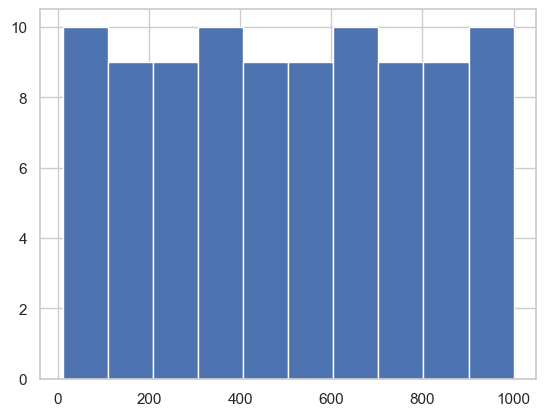

In [150]:
import matplotlib.pyplot as plt

plt.hist(final_df['score'])
plt.show()


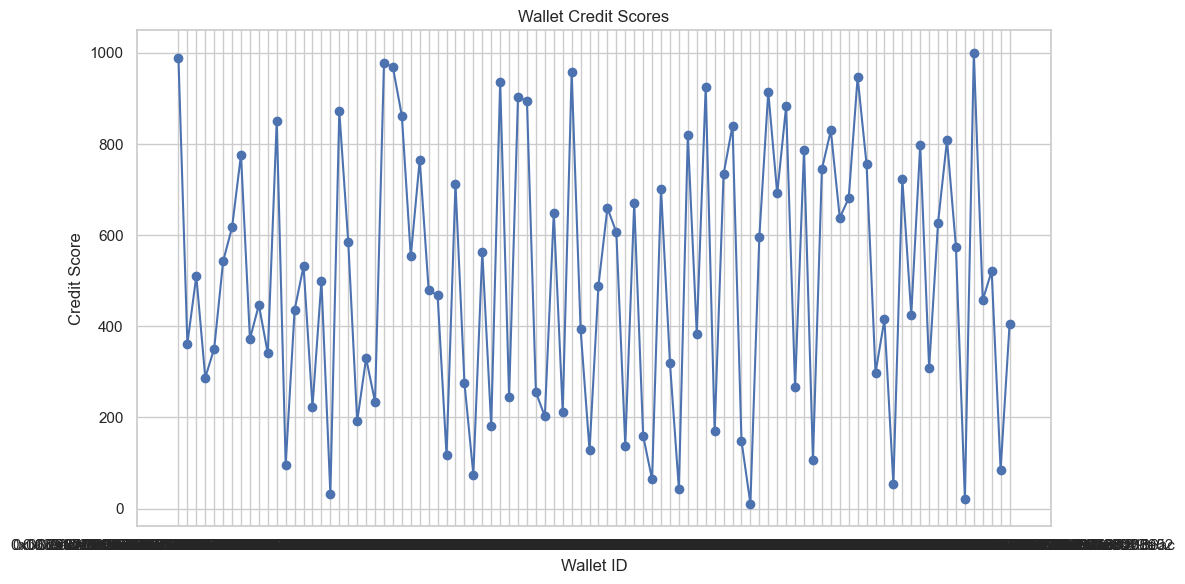

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(final_df['wallet_id'], final_df['score'], marker='o', linestyle='-')
plt.title('Wallet Credit Scores')
plt.xlabel('Wallet ID')
plt.ylabel('Credit Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save Output

In [152]:
import os

# Create the output folder if it doesn't exist
os.makedirs("output", exist_ok=True)

# Save the DataFrame to CSV
final_df.to_csv("output/wallet_scores.csv", index=False)
